In [ ]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import numpy as np
import pandas as pd
from sklearn import tree
import graphviz 
import matplotlib.pyplot as plt

In [ ]:
# load toy dataset
# data = datasets.load_boston()
# pd_data = pd.DataFrame(boston.data, columns = boston.feature_names)

In [ ]:
# import data from github
url = 'https://raw.githubusercontent.com/taimaruuu/machine-learning/master/assn1/heart.csv?token=ADS73SCELMZFODVIB3ETT3DBKNEFA'
data_pd = pd.read_csv(url)

In [ ]:
# preview drug data
data_pd.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
# ensure there are no nan fields in the data (if there are any to begin with)
# notice we didn't normalize data for this example because there is no effect on it for DT
data_pd.dropna(axis=0)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
# create X and Y data
x, y = data_pd.iloc[:, :-1], data_pd.iloc[:, -1:]

In [ ]:
from sklearn.metrics import *

no_strat_model = DecisionTreeClassifier().fit(x_train, y_train)
strat_model = DecisionTreeClassifier().fit(x_train_strat, y_train_strat)

y_train_pred = no_strat_model.predict(x_train)
y_test_pred = no_strat_model.predict(x_test)
print("Non-Stratified Metrics")
print("Training weighted F1 on default decision tree params and no stratification: " + str(f1_score(y_train, y_train_pred, average='weighted')))
print("Testing weighted F1 on default decision tree params and no stratification: " + str(f1_score(y_test, y_test_pred, average='weighted')))

print()

y_train_pred_strat = strat_model.predict(x_train_strat)
y_test_pred_strat = strat_model.predict(x_test_strat)
print("Stratified Metrics")
print("Training weighted F1 on default decision tree params and stratification: " + str(f1_score(y_train_strat, y_train_pred_strat, average='weighted')))
print("Testing weighted F1 on default decision tree params and stratification: " + str(f1_score(y_test_strat, y_test_pred_strat, average='weighted')))

Non-Stratified Metrics
Training weighted F1 on default decision tree params and no stratification: 1.0
Testing weighted F1 on default decision tree params and no stratification: 0.7222464103539462

Stratified Metrics
Training weighted F1 on default decision tree params and stratification: 1.0
Testing weighted F1 on default decision tree params and stratification: 0.7208577084769892


[0.7264508384289305, 0.8032786885245902, 0.8171821025801224, 0.7839424848674174, 0.781880594141991, 0.6688884885606196, 0.7367048823172258, 0.6864804529377748, 0.7351107908484957, 0.7839424848674174, 0.7194825105232723, 0.7682219419924339, 0.7174632494420072, 0.7367048823172258, 0.7019996397045578, 0.7839424848674174, 0.8013330931363717, 0.7367048823172258, 0.7367048823172258, 0.7194825105232723, 0.6864804529377748, 0.7351107908484957, 0.7351107908484957, 0.7367048823172258, 0.7524845681087695, 0.7367048823172258, 0.7524845681087695, 0.7351107908484957, 0.7839424848674174, 0.7367048823172258, 0.7351107908484957, 0.7839424848674174, 0.7351107908484957, 0.6864804529377748, 0.7682219419924339, 0.670881102896532, 0.7174632494420072, 0.6864804529377748, 0.7351107908484957, 0.7507028671547123, 0.6864804529377748, 0.7696167720275725, 0.7194825105232723, 0.7194825105232723, 0.7367048823172258, 0.7524845681087695, 0.7194825105232723, 0.7367048823172258]


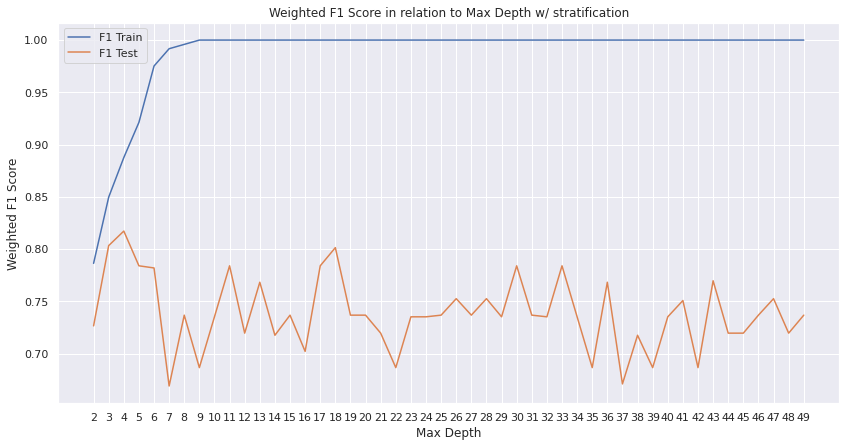

In [ ]:
# find best max_depth for DT

from sklearn.metrics import f1_score
import seaborn as sns

f1_test = []
f1_train = []

typical_n = 50

for i in range(2, typical_n):
  model = DecisionTreeClassifier(max_depth=i)
  model.fit(x_train_strat, y_train_strat.values.ravel())
  
  y_pred_train_strat = model.predict(x_train_strat)
  f1_train.append(f1_score(y_train_strat, y_pred_train_strat, average='weighted'))
  
  y_pred_test_strat = model.predict(x_test_strat)
  f1_test.append(f1_score(y_test_strat, y_pred_test_strat, average='weighted'))

# plt.plot(range(1, typical_n), f1_)
# plt.xlabel('K Neighbor Value')
# plt.ylabel('Weighted F1 Score')
# plt.show()

print(f1_test)

sns.set()
plt.figure(figsize=(14,7))
sns.lineplot(y=f1_train, x=range(2, typical_n), label="F1 Train")
sns.lineplot(y=f1_test, x=range(2, typical_n), label="F1 Test")
plt.xticks(ticks=np.arange(2, typical_n, 1))
plt.xlabel('Max Depth')
plt.ylabel('Weighted F1 Score')
plt.title('Weighted F1 Score in relation to Max Depth w/ stratification')
plt.show()

# print("Best Test score is acheived with max_depth = " + str(np.argmax(f1_test) + 1) + " with an F1 weighted score of " + str(np.max(f1_test)))

[0.7868852459016394, 0.7371595959790944, 0.8025286617379193, 0.7871153293068737, 0.8032786885245902, 0.8032786885245902, 0.8032786885245902, 0.799672131147541, 0.8344442442803099, 0.8344442442803099, 0.8344442442803099, 0.8171821025801224, 0.8171821025801224, 0.8171821025801224, 0.8171821025801224, 0.8171821025801224, 0.8171821025801224, 0.8171821025801224, 0.8171821025801224, 0.8171821025801224, 0.8171821025801224, 0.8171821025801224, 0.8171821025801224]


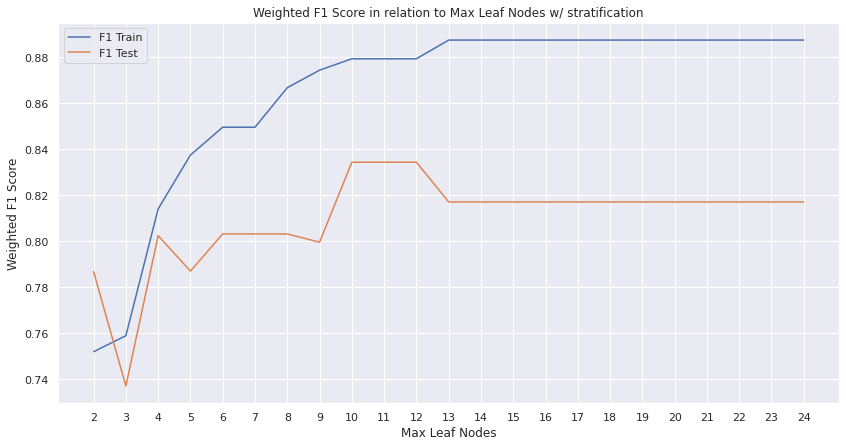

In [ ]:
# find best max_depth for DT

from sklearn.metrics import f1_score
import seaborn as sns

f1_test = []
f1_train = []

typical_n = 25

for i in range(2, typical_n):
  model = DecisionTreeClassifier(max_leaf_nodes=i, max_depth=4)
  model.fit(x_train_strat, y_train_strat.values.ravel())
  y_pred_train_strat = model.predict(x_train_strat)
  f1_train.append(f1_score(y_train_strat, y_pred_train_strat, average='weighted'))
  
  y_pred_test_strat = model.predict(x_test_strat)
  f1_test.append(f1_score(y_test_strat, y_pred_test_strat, average='weighted'))

# plt.plot(range(1, typical_n), f1_)
# plt.xlabel('K Neighbor Value')
# plt.ylabel('Weighted F1 Score')
# plt.show()

print(f1_test)

sns.set()
plt.figure(figsize=(14,7))
sns.lineplot(y=f1_train, x=range(2, typical_n), label="F1 Train")
sns.lineplot(y=f1_test, x=range(2, typical_n), label="F1 Test")
plt.xticks(ticks=np.arange(2, typical_n, 1))
plt.xlabel('Max Leaf Nodes')
plt.ylabel('Weighted F1 Score')
plt.title('Weighted F1 Score in relation to Max Leaf Nodes w/ stratification')
plt.show()


In [ ]:
strat_model = DecisionTreeClassifier(max_depth=4, max_leaf_nodes=12).fit(x_train_strat, y_train_strat.values.ravel())

y_train_pred_strat = strat_model.predict(x_train_strat)
y_test_pred_strat = strat_model.predict(x_test_strat)
print("Stratified Metrics")
print("Training weighted F1 on default decision tree params and stratification: " + str(f1_score(y_train_strat, y_train_pred_strat, average='weighted')))
print("Testing weighted F1 on default decision tree params and stratification: " + str(f1_score(y_test_strat, y_test_pred_strat, average='weighted')))

Stratified Metrics
Training weighted F1 on default decision tree params and stratification: 0.8794084384515006
Testing weighted F1 on default decision tree params and stratification: 0.8344442442803099


In [ ]:
# using the mobile dataset
# import data from github
url = 'https://raw.githubusercontent.com/taimaruuu/machine-learning/master/assn1/mobile_train.csv?token=ADS73SDPPDJB3ZAZ6EHYGVLBLHUUU'
data_pd = pd.read_csv(url)

# ensure there are no nan fields in the data (if there are any to begin with)
# notice we didn't normalize data for this example because there is no effect on it for DT
data_pd.dropna(axis=0)
data_pd

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0


In [ ]:
# create X and Y data
x, y = data_pd.iloc[:, :-1], data_pd.iloc[:, -1:]

# create test / train split with 80 / 20 split respectively without stratifying data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=11)

# create test / train split with 80 / 20 split respectively with stratifying data
x_train_strat, x_test_strat, y_train_strat, y_test_strat = train_test_split(x, y, test_size=0.2, random_state=11, stratify=y)

In [ ]:
from sklearn.metrics import *

no_strat_model = DecisionTreeClassifier().fit(x_train, y_train)
strat_model = DecisionTreeClassifier().fit(x_train_strat, y_train_strat)

y_train_pred = no_strat_model.predict(x_train)
y_test_pred = no_strat_model.predict(x_test)
print("Non-Stratified Metrics")
print("Training weighted F1 on default decision tree params and no stratification: " + str(f1_score(y_train, y_train_pred, average='weighted')))
print("Testing weighted F1 on default decision tree params and no stratification: " + str(f1_score(y_test, y_test_pred, average='weighted')))

print()

y_train_pred_strat = strat_model.predict(x_train_strat)
y_test_pred_strat = strat_model.predict(x_test_strat)
print("Stratified Metrics")
print("Training weighted F1 on default decision tree params and stratification: " + str(f1_score(y_train_strat, y_train_pred_strat, average='weighted')))
print("Testing weighted F1 on default decision tree params and stratification: " + str(f1_score(y_test_strat, y_test_pred_strat, average='weighted')))

Non-Stratified Metrics
Training weighted F1 on default decision tree params and no stratification: 1.0
Testing weighted F1 on default decision tree params and no stratification: 0.8628576366287396

Stratified Metrics
Training weighted F1 on default decision tree params and stratification: 1.0
Testing weighted F1 on default decision tree params and stratification: 0.7879217036987012


[0.7691367649813928, 0.7784693100479595, 0.7977075167566133, 0.8602668662127746, 0.8553265586498309, 0.8665191859410516, 0.8656270119988294, 0.878274659072359, 0.861220815277062, 0.8683788183352315, 0.8682547120134724, 0.8609424781517364, 0.8650518184131378, 0.8556684491978611, 0.8678830995745972, 0.855916589992203, 0.8532211661626383, 0.858284819082272, 0.8630166295394498, 0.8554782029807155, 0.8454511583349253, 0.8557953630609118, 0.8778211330419539, 0.8633138183655426, 0.8713676827286139, 0.8629549087270127, 0.8555417275037854, 0.8776893967837874, 0.8754525736686541, 0.8685866766159003, 0.8631907704132058, 0.8527799677774794, 0.8708988738573143, 0.8704097001406013, 0.8907505219927914, 0.86069048004315, 0.8581551130029392, 0.8668792344237392, 0.8753251159177531, 0.8699990549399707, 0.8731942127624356, 0.8656465739890372, 0.873201914317923, 0.8532358211168991, 0.8607390372724893, 0.863836984518779, 0.8727602193278458, 0.8583489490793942]


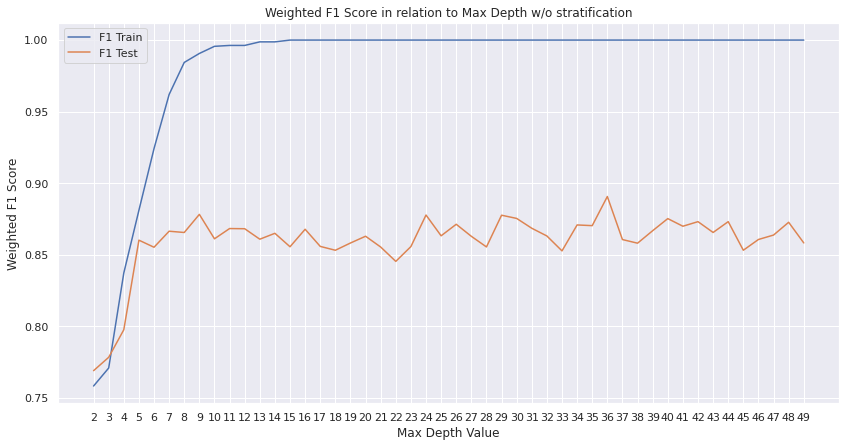

In [ ]:
# find best max_depth for DT

from sklearn.metrics import f1_score
import seaborn as sns

f1_test = []
f1_train = []

typical_n = 50

for i in range(2, typical_n):
  model = DecisionTreeClassifier(max_depth=i)
  model.fit(x_train, y_train.values.ravel())
  
  y_pred_train = model.predict(x_train)
  f1_train.append(f1_score(y_train, y_pred_train, average='weighted'))
  
  y_pred_test = model.predict(x_test)
  f1_test.append(f1_score(y_test, y_pred_test, average='weighted'))

# plt.plot(range(1, typical_n), f1_)
# plt.xlabel('K Neighbor Value')
# plt.ylabel('Weighted F1 Score')
# plt.show()

print(f1_test)

sns.set()
plt.figure(figsize=(14,7))
sns.lineplot(y=f1_train, x=range(2, typical_n), label="F1 Train")
sns.lineplot(y=f1_test, x=range(2, typical_n), label="F1 Test")
plt.xticks(ticks=np.arange(2, typical_n, 1))
plt.xlabel('Max Depth Value')
plt.ylabel('Weighted F1 Score')
plt.title('Weighted F1 Score in relation to Max Depth w/o stratification')
plt.show()

[0.34786894140342417, 0.5742909345465571, 0.7691367649813928, 0.7691367649813928, 0.7977711045579425, 0.7838327147142675, 0.7849232768363504, 0.8144619367251892, 0.822432417089094, 0.822432417089094, 0.8205289064456229, 0.8205289064456229, 0.8197401816724552, 0.8226369921790219, 0.8344645912552298, 0.8344645912552298, 0.8344645912552298, 0.8376302599839185, 0.8474143036858317, 0.8666596169805798, 0.8666596169805798, 0.8692389879585058, 0.8692389879585058, 0.8692389879585058, 0.8695640092253177, 0.8695640092253177, 0.8643016413405298, 0.8640056379136564, 0.8640056379136564, 0.8613328728461082, 0.8543031915121165, 0.8589944636958893, 0.8444274881340932, 0.8490105094339352, 0.8467863476471393, 0.8545077832042308, 0.8566951115224613, 0.8520831237851564, 0.8517999289765809, 0.8468742544959327, 0.861590294068342, 0.8490810213689857, 0.8496944306991391, 0.8540351664988941, 0.8490810213689857, 0.8566202056682797, 0.8546310096727977, 0.8500258247517353, 0.8501617296093635, 0.8529974989095858, 0

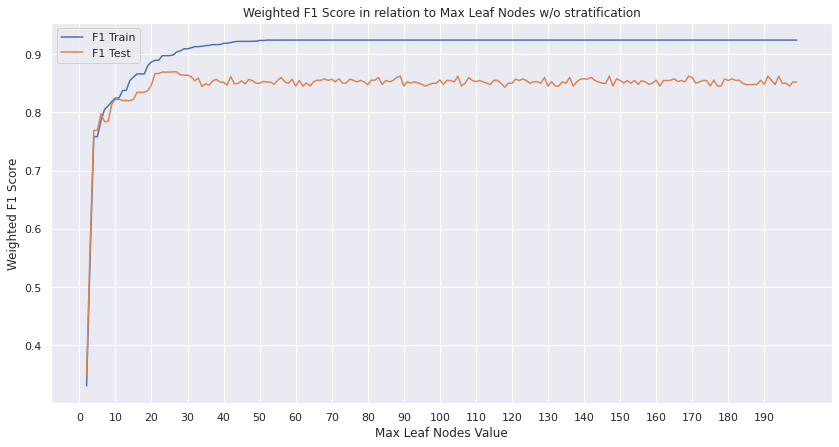

In [ ]:
# find best max_depth for DT

from sklearn.metrics import f1_score
import seaborn as sns

f1_test = []
f1_train = []

typical_n = 200

for i in range(2, typical_n):
  model = DecisionTreeClassifier(max_leaf_nodes=i, max_depth=6)
  model.fit(x_train, y_train.values.ravel())
  
  y_pred_train = model.predict(x_train)
  f1_train.append(f1_score(y_train, y_pred_train, average='weighted'))
  
  y_pred_test = model.predict(x_test)
  f1_test.append(f1_score(y_test, y_pred_test, average='weighted'))

# plt.plot(range(1, typical_n), f1_)
# plt.xlabel('K Neighbor Value')
# plt.ylabel('Weighted F1 Score')
# plt.show()

print(f1_test)

sns.set()
plt.figure(figsize=(14,7))
sns.lineplot(y=f1_train, x=range(2, typical_n), label="F1 Train")
sns.lineplot(y=f1_test, x=range(2, typical_n), label="F1 Test")
plt.xticks(ticks=np.arange(0, typical_n, 10))
plt.xlabel('Max Leaf Nodes Value')
plt.ylabel('Weighted F1 Score')
plt.title('Weighted F1 Score in relation to Max Leaf Nodes w/o stratification')
plt.show()

In [ ]:
model = DecisionTreeClassifier(max_depth=6, max_leaf_nodes=15).fit(x_train, y_train.values.ravel())

y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)
print("Stratified Metrics")
print("Training weighted F1 on default decision tree params and stratification: " + str(f1_score(y_train, y_train_pred, average='weighted')))
print("Testing weighted F1 on default decision tree params and stratification: " + str(f1_score(y_test, y_test_pred, average='weighted')))

Stratified Metrics
Training weighted F1 on default decision tree params and stratification: 0.8606122750150033
Testing weighted F1 on default decision tree params and stratification: 0.8226369921790219
